# Interactive VOI Bayesian parameter fiddler

Little webapp to play with Baeysian parameters for data (or information) accuracy, i.e. sensitivity and specificity inthe context of a VOI (Value of Information) analysis.

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] RangeSlider(start=0.05, step=0.05, value=(0.4, 0.8), value_end=0.8, value_start=0.4)
        [3] Markdown(str)
        [4] FloatSlider(start=0.5, step=0.01, value=0.5)
        [5] Markdown(str)
        [6] FloatSlider(start=0.5, step=0.01, value=0.5)
        [7] Markdown(str)
        [8] Markdown(str)
        [9] FloatSlider(end=0.5, step=0.01, value=0.05)
        [10] Markdown(str)
        [11] RadioButtonGroup(options=['low', 'medium', 'high'], value='medium')
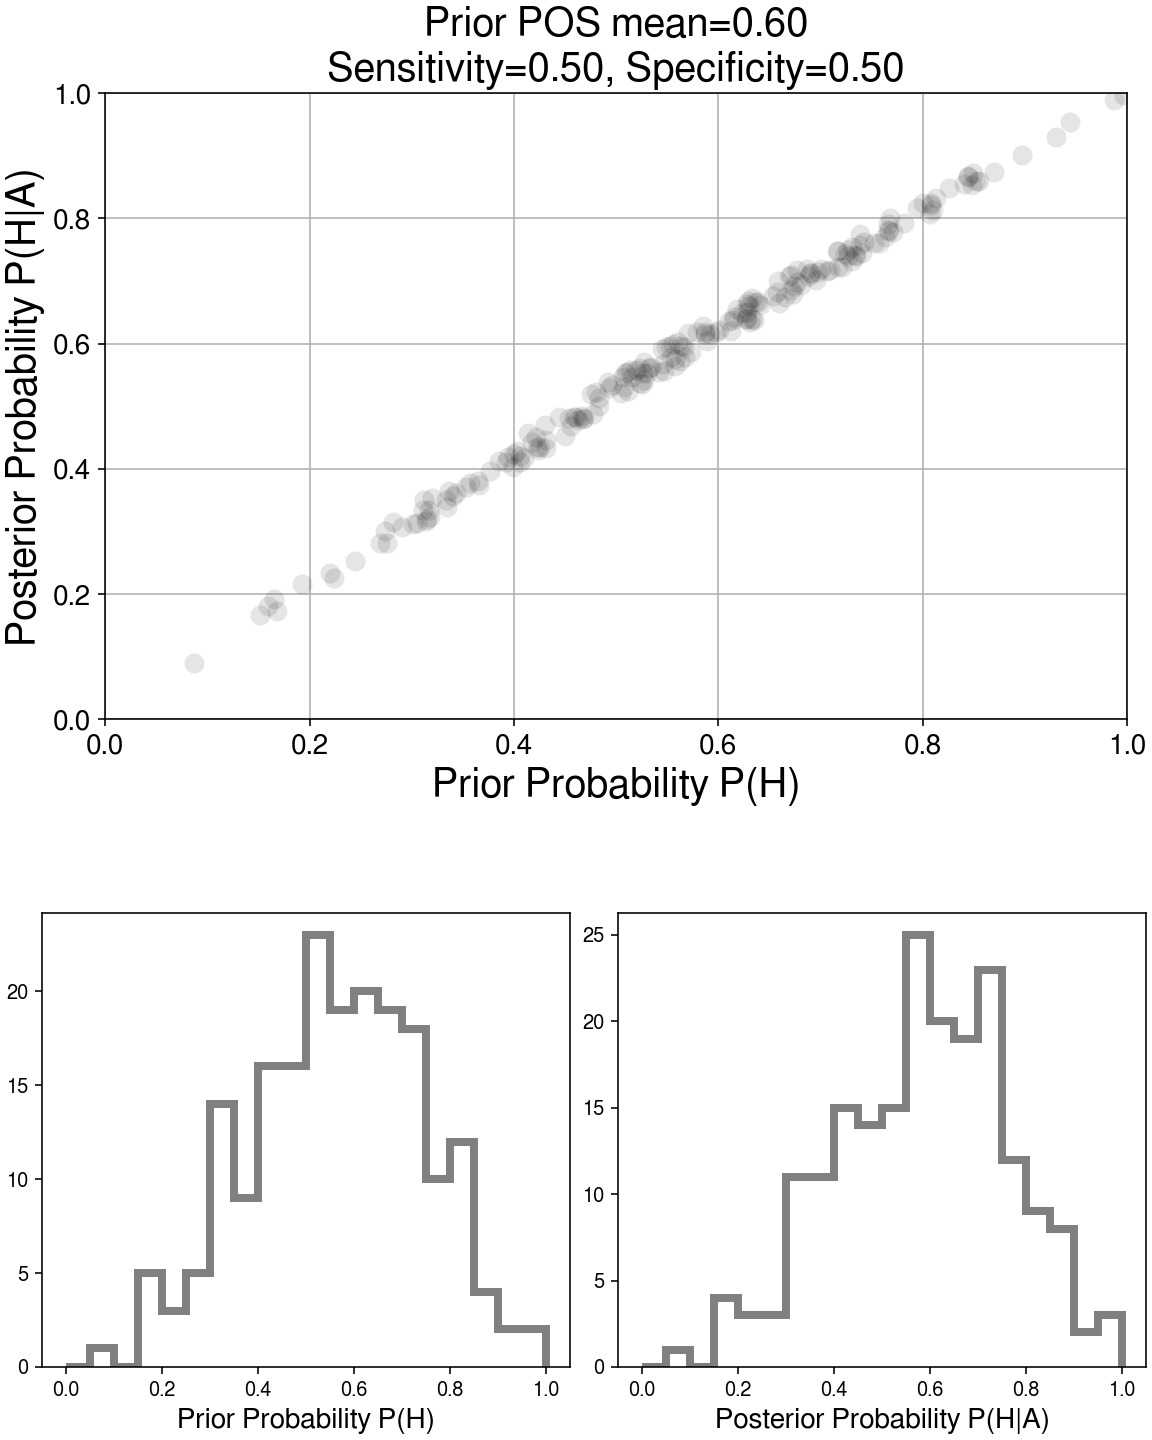

In [1]:
import panel as pn
import panel.widgets as pnw
pn.extension()

from voi_funcs import *


# TODO:
# RUN BINDER TRY THE FOLLOWING OPTIONS TO MAKE IT SERVABLE
# I've followed roughly this: https://github.com/holoviz/jupyter-panel-proxy

#  I discovered kind of by accident that if you just specify urlpath=panel on binder it renders all your Panel-servable notebooks thusly: https://aws-uswest2-binder.pangeo.io/v2/gh/reproducible-notebooks/Holoviz-Demos/master?urlpath=panel


#--- panel app
#    to launch from shell:
#    panel serve --show voi_panel_app.py
#    panel serve --show --autoreload voi_panel_app.py

#--- App 1: shows bayesian update of posterior pos depending on
#    false positive and false negative expected (like MCard Excel)

# grades = ['n/a', 'many', 'some', 'few', 'rare']
# widget_sens  = pnw.RadioButtonGroup(name='Exp_FN', value='n/a', options=grades)
# widget_spec  = pnw.RadioButtonGroup(name='Exp_FP', value='n/a', options=grades)
# reactive_outliers = pn.bind(pn_plot_posterior, widget_sens, widget_spec)
# widgets   = pn.Column("# Bayesian parameters",
#                       "Expectation False Negatives", widget_sens,
#                       "Expectation False Positives", widget_spec)
# tool = pn.Row(reactive_outliers, widgets)
# tool.servable()


#--- App 2: shows bayesian update of posterior pos depending on
#    sensitivity, specificity plus random noise added

grades = ['n/a', 'many', 'some', 'few', 'rare']
wpos  = pnw.RangeSlider(value=(0.4, 0.8), start=0.05, end=1.0, step=0.05)
wsens  = pnw.FloatSlider(value=0.5, start=0.5, end=1.0, step=0.01)
wspec  = pnw.FloatSlider(value=0.5, start=0.5, end=1.0, step=0.01)
wnoise  = pnw.FloatSlider(value=0.05, start=0.0, end=0.5, step=0.01)
wsamp  = pnw.RadioButtonGroup(options=['low', 'medium', 'high'], value='medium')
reactive_outliers = pn.bind(pn_simulation_posterior_v2, wpos, wsens, wspec, wnoise, wsamp)

widgets   = pn.Column('## Bayesian parameters',
                      'Prior POS', wpos,
                      'Sensitivity', wsens,
                      'Specificity', wspec,
                      '## Simulation parameters',
                      'Max noise', wnoise,
                      'Samples', wsamp)
tool = pn.Row(reactive_outliers, widgets)
tool.servable()